# Projet: Préparation et Analyse des données

## Collecte des données

Les bibliothèques 

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

1. Chargement des données archives Twitter de WeRateDogs (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Téléchargement par programme en utilisant la bibliothèque Requests des prédictions de l’image tweet (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Enregistrement du contenu dans un fichier TSV (image_predictions.tsv)

with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Chargement des données
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

3. Recherche des données additionnelles avec le paquet tweepy (tweet_json.txt)

NB: La partie du code mise en commentaire a été copié sur Udacity pour la production du fichier tweet-json.txt, par ailleur le fichier tweet-json.txt utiliser dans ce projet a été simplement télécharger.

In [5]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

In [7]:
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [10]:
# Lecture du fichier ligne par ligne et création d'une liste des listes
liste_listes = []
with open('tweet-json.txt', encoding='utf-8') as file:
    ligne = file.readline()
    while ligne:
        liste_listes.append(ligne.split(','))
        ligne = file.readline()

In [11]:
#Convertir en data frame
df_list = []
for liste in liste_listes:
    ids = liste[1].split(':')
    retweet = liste[-7].split(':')
    favorite = liste[-6].split(':')
    
    #ajout dans le dictionnaire
    df_list.append({'tweet_id': ids[1],
                   'retweet_number' : retweet[1],
                   'favorite_number' : favorite[1]})

# lecture dans un data frame
df = pd.DataFrame(df_list, columns=['tweet_id','retweet_number', 'favorite_number' ])

#Enregistrer la base sous format csv
df.to_csv('data_supp.csv', index=False)

In [12]:
#chargement des données
data_supp = pd.read_csv('data_supp.csv')

## Evaluation des données

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
data_supp

,tweet_id,retweet_number,favorite_number
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
data_supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   int64 
 1   retweet_number   2354 non-null   object
 2   favorite_number  2354 non-null   object
dtypes: int64(1), object(2)
memory usage: 55.3+ KB


In [19]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(data_supp))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [20]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [23]:
twitter_archive[twitter_archive['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [24]:
twitter_archive.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [25]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
186,856288084350160898,8.562860e+17,279280991.0,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680085611...,12,10,by,None,None,None,None
1000,747963614829678593,NaN,NaN,2016-06-29 01:23:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747963614...,10,10,None,None,None,pupper,None
968,750147208377409536,NaN,NaN,2016-07-05 02:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","And finally, happy 4th of July from the squad ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/750147208...,13,10,None,None,None,None,None
463,817423860136083457,NaN,NaN,2017-01-06 17:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None


In [26]:
sum(twitter_archive.duplicated())

0

In [27]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [29]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [30]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [32]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [33]:
twitter_archive.duplicated().sum()

0

In [34]:
data_supp.duplicated().sum()

0

In [35]:
image_predictions.duplicated().sum()

0

### Problèmes de qualité

1. Traitement des noms introduits par named et name is, non pris en compte lors de l'extraction.

2. Traitement des noms mal extrait.

3. Erreur sur le nom 'O' lors de l'extraction.

4. Remplacer les None par les NaN.

5. Données manquantes pour les colonnes in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

6. Doublons des noms à cause des retweets.

7. Repetition d'une ou plusieurs url dans la colonne expanded_urls.

8. Erreur de type des colonnes retweet_number, favorite_number et timestamp.

### Problèmes de structure

1. Deux enregistrements en plus dans les données twitter_archive ou en moins pour les données data_add.

2. Quatres variables sont dans une colonne dans les données twitter_archive (text, rating_numerator, rating_denominator et url).

3. Les variables doggo, floofer, pupper et puppo doivent être regroupés dans une seule et même variable au lieu de 4.

4. Certaines observations ont deux races.

5. Fusionner les trois tables (twitter_archive, images_predictions, data_supp).

## Nettoyage des données

In [36]:
#Copie des données
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
data_supp_clean = data_supp.copy()

### Observations manquantes

#### Deux enregistrements en plus dans les données twitter_archive ou en moins pour les données data_add

#### Definition:
Trouver les deux enregistrements qui sont en surplus dans les données twitter_archive et les supprimer.

#### Code:

In [37]:
twitter_archive_clean.query("tweet_id != 888202515573088257   &  tweet_id != 771004394259247104", inplace= True)
twitter_archive_clean.reset_index(inplace=True, drop=True)

#### Test:

In [38]:
twitter_archive_clean.shape

(2354, 17)

### Problèmes structurelles

#### Quatres variables sont dans une colonne (text) dans les données twitter_archive (text, rating_numerator, rating_denominator et url)

#### Définition:
Spliter par rapport au numérateur (rating_numerator) et rétirer le premier élément de la liste, c'est ça qui constitue le text, les autres colonnes existes déjà dans la base, ensuite remplacer la colonne text.

#### Code:

In [39]:
n = len(twitter_archive_clean)
texte = []
for i in range(n):
    t = twitter_archive_clean.rating_numerator[i]
    test = twitter_archive_clean.text[i].split("{}".format(t))
    texte.append(test[0])

twitter_archive_clean.text = texte

#### Test:

In [40]:
for line in twitter_archive_clean.text.head():
    print(line)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 
This is Darla. She commenced a snooze mid meal. 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 


In [41]:
twitter_archive_clean.text.sample(5)

2276                                           Ermergerd 
1531       This is Covach. He's trying to melt the snow. 
990     That is Quizno. This is his beach. He does not...
1356    This is Charlie. He's a West Side Niddlewog. M...
2131    Meet Winston. He wants to be a power drill. Ve...
Name: text, dtype: object

### Certaines observations ont deux races.

#### Définition:
Parcourir les lignes et les colonnes des races, réssortir les observations ayant plus d'une race et les supprimées.

#### Code:

In [42]:
#Recherche des index des observations ayant deux races

ind_col_race = [13, 14, 15 ,16]
races = ['doggo','floofer', 'pupper', 'puppo']
index = []

for line in range(twitter_archive_clean.shape[0]):
    
    list_race = []
    
    for col in ind_col_race:
        
        race = twitter_archive_clean.iloc[line, col]
        
        if race in races:
            
            list_race.append(race)
    
    if len(list_race) > 1:
        
        index.append(line)
index

[190, 199, 459, 530, 564, 574, 704, 732, 777, 820, 887, 954, 1061, 1111]

In [43]:
#Suppression de ces observations

twitter_archive_clean.drop(twitter_archive_clean.index[index], inplace=True)
twitter_archive_clean.reset_index(inplace=True, drop=True)

#### Test:

In [44]:
#Vérification : L'index_test doit être vide

ind_col_race = [13, 14, 15 ,16]
races = ['doggo','floofer', 'pupper', 'puppo']
index_test = []

for line in range(twitter_archive_clean.shape[0]):
    
    list_race = []
    
    for col in ind_col_race:
        
        race = twitter_archive_clean.iloc[line, col]
        
        if race in races:
            
            list_race.append(race)
    
    if len(list_race) > 1:
        
        index.append(line)
index_test

[]

In [45]:
#Le nombre des observations doit passer de 2354 à 2340
twitter_archive_clean.shape

(2340, 17)

### Les variables doggo, floofer, pupper et puppo doivent être regroupés dans une seule variable au lieu de 4.

#### Définition:
Parcourir les lignes du dataframe et les 4 colonnes races, récuperer les races pour chaque observation et les mettre dans une seule variable appélé **race**; supprimer les quatres colonnes, les variables doggo, floofer, pupper et puppo. 

#### Code:

In [46]:
#Recupération des races

ind_col_race = [13, 14, 15 ,16]
races = ['doggo','floofer', 'pupper', 'puppo']
race_nv = []

for ligne in range(twitter_archive_clean.shape[0]):
    
    list_obv = []
    
    for col in ind_col_race:
        
        race = twitter_archive_clean.iloc[ligne, col]
        
        if race in races:
            
            list_obv.append(race)
        else:
            if race not in list_obv:
                
                list_obv.append(race)
    
    if len(list_obv) == 2 :
        for race in list_obv:
            if race != 'None':
                race_nv.append(race)
        
    else:
        race = 'None'
        race_nv.append(race)

twitter_archive_clean['race'] = race_nv

In [47]:
#Suppression des variables 'doggo', 'floofer', 'pupper', 'puppo'
twitter_archive_clean.drop(['doggo','floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test:

In [48]:
#La colonne race doit contenir les races 'doggo','floofer', 'pupper', 'puppo'

twitter_archive_clean.race.value_counts()

None       1975
pupper      244
doggo        83
puppo        29
floofer       9
Name: race, dtype: int64

In [49]:
#Les colonnes de twitter doivent passser de 17 à 14
twitter_archive_clean.shape

(2340, 14)

### Fusion des trois tables de données

#### Définition:
Fusionnez les colonnes de **data_supp** au tableau **twitter_archive**, en joignant avec la colonne tweet_id, ensuite fusionner avec **images_predictions**.

#### Code:

In [50]:
twitter_archive_clean = pd.merge(twitter_archive_clean, data_supp_clean,
                            on='tweet_id', how='left')

In [51]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id', how = 'left')

#### Test:

In [52]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2336,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2337,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2338,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


##  Les problèmes de qualités:

### Traitement des noms introduits par named et name is, non pris en compte lors de l'extraction

#### Définition:
Extraire les noms introduits par **named** et **name is**, les mettre dans la colonne name à partir de leur indexe, remplacer les noms qui sont mal extraits par des nones.

#### Code:

In [53]:
#Extraire les noms qui sont introduits par 'named' et 'name is'
list_name = []

name_condition = ['named', 'name']

for line in twitter_archive_clean.index:
    
    list_words = twitter_archive_clean.text[line].split()
    
    for index, word in enumerate(list_words):
        
        if word in name_condition:
            
            if word == 'name':
            
                new_name = list_words[index + 2]
                list_name.append([line, new_name])
            
            else:
                new_name = list_words[index + 1]
                list_name.append([line, new_name])


In [54]:
#Supression des éléments à la position 3, 7 et 8 car l'extraction n'a pas été bien faite (ils ont leur nom correcte)
remove_list = [3, 7, 8]
for ind in remove_list:
    list_name.remove(list_name[ind])

In [55]:
#On enlève les points à la fin de chaque nom
for line in list_name:
    point = line[1].replace('.', '')
    line[1] = point

In [56]:
#Remplacement des noms 'Dog', 'Big', 'dogs' par 'Dog God', 'Big Jumpy', 'Kreggory' (une erreur de notre extraction)
list_name[12][1] = 'Dog God'
list_name[27][1] = 'Big Jumpy'
list_name[35][1] = 'Kreggory'

In [57]:
#Placement de ces noms dans la colonne name de la base twitter_archive_clean

for i in list_name:
    twitter_archive_clean.name.replace(i[0], i[1], inplace=True)

### Test:

In [58]:
twitter_archive_clean.name.value_counts()

None          736
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Ace             1
Tayzie          1
Grizzie         1
Gilbert         1
Christoper      1
Name: name, Length: 954, dtype: int64

### Traitement  des noms 'the', 'an', 'one', 'quite', 'not', 'all', ...  qui devrait être des None

#### Définition:
Parcourir la liste des noms détecter et les remplacer par **None**.

#### Code:

In [59]:
#Nous avons identifier certains noms qui devrait être des None
noms_none = ['the', 'an', 'one', 'quite', 'not', 'all', 'by', 'his', 'my', 'life', 'light', 'this', 
             'unacceptable', 'space', 'such', 'officially', 'old', 'a']

for i in range(twitter_archive_clean.shape[0]):
    name = twitter_archive_clean.name[i]
    if name in noms_none:
        twitter_archive_clean.name.replace(name, 'None', inplace= True)

### Test:

In [60]:
#Le nombre de none doit augmenter
twitter_archive_clean.name.value_counts()

None          828
Charlie        12
Cooper         11
Lucy           11
Oliver         11
             ... 
Gert            1
Dex             1
Ace             1
Tayzie          1
Christoper      1
Name: name, Length: 936, dtype: int64

### Erreur sur le nom 'O' lors de l'extraction

#### Définition:
Remplacer le nom "O" de la colonne **name** de twitter_archive par "O'Malley"

#### Code:

In [61]:
twitter_archive_clean.name.replace('O', "O'Malley", inplace=True)

#### Test:

In [62]:
twitter_archive_clean[twitter_archive_clean.name == "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
766,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,...,1.0,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


### Remplacer les None par les Nan

#### Définition:
Remplacer les 'None' des colonnes **race** et **name** par des NaN en utilisant la fonction replace.

#### Code:

In [63]:

twitter_archive_clean.name.replace(to_replace= 'None', value=np.nan, inplace=True)
twitter_archive_clean.race.replace(to_replace= 'None', value=np.nan, inplace=True)

#### Test

In [64]:
twitter_archive_clean.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2109,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,...,1.0,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,0.003897,False
1428,696713835009417216,NaN,NaN,2016-02-08 15:14:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Trevith. He's a Swiss Mountain Roadwoo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696713835...,...,1.0,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True
1151,721503162398597120,NaN,NaN,2016-04-17 00:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Panda. He's happy af.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/721503162...,...,3.0,Pomeranian,0.997750,True,Chihuahua,0.001248,True,Pekinese,0.000775,True
948,750868782890057730,NaN,NaN,2016-07-07 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo. He hauled ass until he ran out of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750868782...,...,4.0,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
137,865718153858494464,NaN,NaN,2017-05-19 23:57:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Boomer. He's just checking pup on you. Ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865718153...,...,1.0,golden_retriever,0.673664,True,kuvasz,0.157523,True,Labrador_retriever,0.126073,True
2096,670435821946826752,NaN,NaN,2015-11-28 02:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two unbelievably athletic dogs here. Great for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670435821...,...,1.0,sorrel,0.460370,False,basenji,0.135767,True,Cardigan,0.099174,True
1383,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,...,1.0,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False


### Données manquantes pour les colonnes in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, ...

#### Definition: 
Ressortir la proportion des données manquantes pour chaque variable. Si cette proportion est supérieure à 15 % supprimer la colonne, inférieure à 15% faire une imputation et inférieure à 5% possibilité de supprimer ces observations.

#### Code:

In [65]:
#Pourcentage des valeur manquantes
(twitter_archive_clean.isna().sum()*100/twitter_archive_clean.shape[0]).sort_values(ascending=True)

tweet_id                       0.000000
retweet_number                 0.000000
timestamp                      0.000000
source                         0.000000
text                           0.000000
rating_denominator             0.000000
favorite_number                0.000000
rating_numerator               0.000000
expanded_urls                  2.521368
p1                            11.965812
p1_conf                       11.965812
p1_dog                        11.965812
p2_conf                       11.965812
p2_dog                        11.965812
p3                            11.965812
p2                            11.965812
img_num                       11.965812
p3_dog                        11.965812
p3_conf                       11.965812
jpg_url                       11.965812
name                          35.384615
race                          84.401709
retweeted_status_timestamp    92.435897
retweeted_status_user_id      92.435897
retweeted_status_id           92.435897


In [66]:
#Suppression des colonnes qui ont plus de 50 % des valeurs manquantes: race, retweeted_status_id, retweeted_status_user_id
#retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id.

twitter_archive_clean.drop(['race', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
                            'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [67]:
#Suppression des observations qui ont de valeurs manquantes au niveau des colonnes expanded_urls, p1, p1_conf, 
#p1_dog, p2_conf, p2_dog, p3, p2, img_num, p3_dog, p3_conf, jpg_url et name

twitter_archive_clean.dropna(inplace=True)
twitter_archive_clean.reset_index(inplace=True, drop=True)

#### Test:

In [68]:
(twitter_archive_clean.isna().sum()*100/twitter_archive_clean.shape[0]).sort_values(ascending=True)

tweet_id              0.0
p3                    0.0
p2_dog                0.0
p2_conf               0.0
p2                    0.0
p1_dog                0.0
p1_conf               0.0
p1                    0.0
img_num               0.0
p3_conf               0.0
jpg_url               0.0
retweet_number        0.0
name                  0.0
rating_denominator    0.0
rating_numerator      0.0
expanded_urls         0.0
text                  0.0
source                0.0
timestamp             0.0
favorite_number       0.0
p3_dog                0.0
dtype: float64

### Doublons des noms dans la colone name à cause des retweet

#### Définition :
Extraire les index des lignes qui commencent par **RT @**, les stockés dans une liste et suprimer les observations correspondant à ces indices.

#### Code:

In [69]:
#Liste des indexes des retweets
line_rt = []

for line in range(twitter_archive_clean.shape[0]):
    
    if twitter_archive_clean.text[line].startswith('RT @'):
        line_rt.append(line)

In [70]:
#Suppression de ces lignes qui constitue les doublons au niveau des noms
twitter_archive_clean.drop(twitter_archive_clean.index[line_rt], inplace=True)
twitter_archive_clean.reset_index(inplace=True, drop=True) #Pour reindexer la base

#### Test:


In [71]:
#Liste des indexes des retweets doit être vide
line_sns_rt = []

for line in range(twitter_archive_clean.shape[0]):
    
    if twitter_archive_clean.text[line].startswith('RT @'):
        line_sns_rt.append(line)
line_sns_rt

[]

In [72]:
twitter_archive_clean.shape

(1357, 21)

In [73]:
twitter_archive_clean.name.value_counts()

Charlie       11
Oliver        10
Cooper        10
Lucy          10
Tucker         9
              ..
Sephie         1
Bonaparte      1
Wishes         1
Rose           1
Christoper     1
Name: name, Length: 916, dtype: int64

### Repetition d'une ou plusieurs url dans la colonne expanded_urls

#### Définition:
Spliter par rapport à (,) et rétirer le premier élément de la liste.

#### Code:

In [74]:
for line in range(twitter_archive_clean.shape[0]):
    url = twitter_archive_clean.expanded_urls[line].split(',')
    twitter_archive_clean.expanded_urls[line] = url[0]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Test:

In [75]:
twitter_archive_clean.expanded_urls.sample(5)

774     https://twitter.com/dog_rates/status/707315916...
420     https://twitter.com/dog_rates/status/783334639...
612     https://twitter.com/dog_rates/status/742385895...
1212    https://twitter.com/dog_rates/status/670811965...
621     https://twitter.com/dog_rates/status/740359016...
Name: expanded_urls, dtype: object

### Erreur de type des colonnes retweet_number, favorite_number et timestamp.

#### Définition:
Convertir **timestamp** en type date, **retweet_number** et **favorite_number** en type entier.

#### Code:

In [76]:
#Convertir la colonne timestamp en type date
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [77]:
#convertir les colonnes retweet_number et favorite_number en type entier
twitter_archive_clean['retweet_number'] = twitter_archive_clean['retweet_number'].astype(int)
twitter_archive_clean['favorite_number'] = twitter_archive_clean['favorite_number'].astype(int)
twitter_archive_clean['img_num'] = twitter_archive_clean['img_num'].astype(int)

#### Test:

In [78]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1357 non-null   int64              
 1   timestamp           1357 non-null   datetime64[ns, UTC]
 2   source              1357 non-null   object             
 3   text                1357 non-null   object             
 4   expanded_urls       1357 non-null   object             
 5   rating_numerator    1357 non-null   int64              
 6   rating_denominator  1357 non-null   int64              
 7   name                1357 non-null   object             
 8   retweet_number      1357 non-null   int32              
 9   favorite_number     1357 non-null   int32              
 10  jpg_url             1357 non-null   object             
 11  img_num             1357 non-null   int32              
 12  p1                  1357 non-null 

## Stockage des données
Enregistrer l'endemble des données collectées, évaluées et nettoyées dans un fichier csv appélé twitter_archive_master.csv

In [79]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyse et visualisation des données

In [80]:
!pip install wordcloud

In [81]:
#les bibliothèques
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### Obsevations:
1. Quel est le chien qui a recu le plus de retweet ?

2. Quel est le chien qui a eu le plus de favorie ?

3. En se basant sur les trois estimations de la race (p1, p2, p3), quelle est la race qui revient plusieurs fois?

#### Quel est le chien qui a recu le plus de retweet ?

In [83]:
twitter_archive_master.retweet_number.describe()

count     1357.000000
mean      2750.796610
std       3965.084969
min         23.000000
25%        709.000000
50%       1540.000000
75%       3347.000000
max      56625.000000
Name: retweet_number, dtype: float64

In [84]:
twitter_archive_master[twitter_archive_master.retweet_number == 56625]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_number,favorite_number,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
317,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help.,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,56625,107015,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


> Le chien nommé **Stephan** est celui qui a plus été retweeter, il a été retweeté 56625 fois sur la période de l'étude.

#### Quel est le chien qui a eu le plus de favorie ?

In [85]:
twitter_archive_master.favorite_number.describe()

count      1357.000000
mean       9394.705232
std       11664.998954
min         107.000000
25%        2371.000000
50%        4878.000000
75%       12306.000000
max      107956.000000
Name: favorite_number, dtype: float64

In [86]:
twitter_archive_master[twitter_archive_master.favorite_number == 107956]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_number,favorite_number,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
46,879415818425184262,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt.,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,45849,107956,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


> Le chien nommé **Duddles** est celui qui à le plus reçu de favorie, 107956 sur la période de l'étude.

####  En se basant sur les trois estimations de la race (p1, p2, p3), quelle est la race la plus populaire des chiens?

In [87]:
#Top 5 des races majoritaires pour les trois estimations
est_p1 = twitter_archive_master.p1.value_counts()[:5]
est_p2 = twitter_archive_master.p2.value_counts()[:5]
est_p3 = twitter_archive_master.p3.value_counts()[:5]

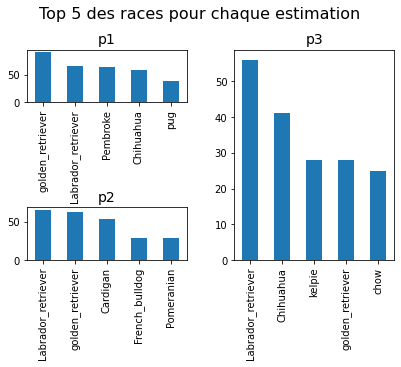

In [88]:
#visualisation avec des barplots
plt.suptitle("Top 5 des races pour chaque estimation", fontsize=16)

plt.subplot(221)
est_p1.plot(kind = "bar")
plt.title("p1", fontsize=14)

plt.subplot(223)
est_p2.plot(kind = "bar")
plt.title("p2", fontsize=14)

plt.subplot(122) 
est_p3.plot(kind = "bar")
plt.title("p3", fontsize=14)

plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.95, top = 0.83, wspace =0.3, hspace = 2)
plt.show()

> Sur les trois estimations de la race des chiens, la race **labrador_retriever** est celle qui semble être majoritaire dans notre échantillon, elle apparait deux fois en tête sur les trois estimations.

### Visualisation:
Visualisation des noms avec un nuage de mots.

In [89]:
names = ''
for name in twitter_archive_master.name:
    names += "".join(name)+" "

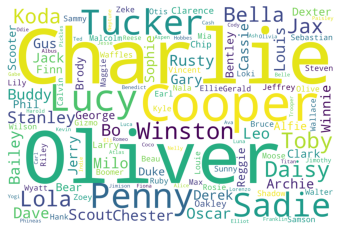

In [90]:
wordcloud = WordCloud(max_words = 130, stopwords = STOPWORDS, background_color = 'white',
                     width = 3000, height = 2000, min_font_size = 10).generate(names)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> Les noms des chiens les plus populaire sont: Charlie, Olivier, Cooper et Lucy.